<a href="https://colab.research.google.com/github/profRCC/Softex/blob/master/CNN_ExpressoesFaciais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Reconhecimento de Expressões Faciais**
* dataset de imagens de rostos de pessoas
* objetivo é reconhecer emoções nas expressões faciais
* 7 tipos de expressões:
  * raiva
  * medo
  * tristeza
  * surpresa
  * alegria
  * nojo
  * neutro

<img src= https://www.kaggleusercontent.com/kf/9149929/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..1NA-TDLU4EaCESBBWDihCQ.zXuHhhfi4-RgynaCZvCtuSksrN1IdbXZTdAje8dPKxHEDWl_bZG4FaEcCI9rGke-LUKMFUAzwknGchs0q6PzY5Qinsm6Hb2iEjnw4A6cBrtCHMge4objnF7hoXcTDR-MzAkLePR-r_ZO_zX-UT2_qTEFHR-L9yr1MOidF3FMMGu-NKK3fEqJtL3vo0sEc8BRyMvAsXjpXgr16gjNMxryQLFaxJe_pXVuzhaiz2L3oOn8eyWSUFRttGYT_vwgq60e8ABQzoV7XLzM3GY3riibrRSsz9Pc2NFT59FMMl_KIwH7dMY0TNTlbcMyhyM0bcrsVxs6UoWmXfSSMMsQw3DxWXbkf5E3MI78RZ9vtr-ExBBklFrunPRyhVUvM1W9zm2X37KjYdLPa5jTHDhsWjq4d-hZ8DDLT744DnTAS0nvwtpwrXS1lmAfuSUOvNdFl6XpAFkvcTMNfktf-Nuwes798bZyD5TPMkW2wL_j5rbKtYKHbA1kypnN_VE0Cs4EmvzMQ3jHlnjpSZUfN-AX9a_c_SZ_zDy8ydNJ04jcKc3L_QQFK6qPmKnoMDCTfnviFuhc16rkNUU4I7hDyfdCpBSpligUfg6fHHul34u1g15hjJfPx3wizDOVkhYWAJbyHGE5GDAhgiUH1itZqV2adDaCYVUwzrF1Z04ykZ9r8kCZd3MSFNaaPBsOlXzpTTRL0f4f.syPGlilleLl4r9raNlp5cg/__results___files/__results___3_1.png width=500>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## **1. Importando bibliotecas**

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2 # opencv
import matplotlib.pyplot as plt
import os

from sklearn.metrics import accuracy_score

from keras import preprocessing
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop

## **2. Lendo imagens**

### Exemplo de leitura de uma imagem

In [ ]:
#lendo imagem
img = cv2.imread('/content/drive/My Drive/Colab Notebooks/Softex/Semana6/datasets/face/train/disgust/299.jpg')

In [ ]:
img.shape

(48, 48, 3)

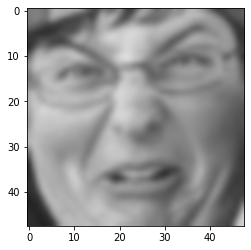

In [ ]:
#plotando imagem
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.show()

In [ ]:
#transformando imagem em matriz de pixels
pixels = np.asarray(img)
pixels

array([[[125, 125, 125],
        [126, 126, 126],
        [128, 128, 128],
        ...,
        [ 91,  91,  91],
        [ 84,  84,  84],
        [ 98,  98,  98]],

       [[123, 123, 123],
        [130, 130, 130],
        [130, 130, 130],
        ...,
        [ 90,  90,  90],
        [ 91,  91,  91],
        [ 97,  97,  97]],

       [[117, 117, 117],
        [131, 131, 131],
        [125, 125, 125],
        ...,
        [ 69,  69,  69],
        [ 85,  85,  85],
        [ 88,  88,  88]],

       ...,

       [[ 43,  43,  43],
        [ 44,  44,  44],
        [ 36,  36,  36],
        ...,
        [ 56,  56,  56],
        [118, 118, 118],
        [205, 205, 205]],

       [[ 47,  47,  47],
        [ 42,  42,  42],
        [ 32,  32,  32],
        ...,
        [ 71,  71,  71],
        [167, 167, 167],
        [211, 211, 211]],

       [[ 46,  46,  46],
        [ 44,  44,  44],
        [ 44,  44,  44],
        ...,
        [106, 106, 106],
        [200, 200, 200],
        [208, 208, 208]]

### Lendo todas as imagens

In [3]:
input_dir = '/content/drive/My Drive/Colab Notebooks/Softex/Semana6/datasets/face/'

In [4]:
#tipo = train ou test
classes = {'angry':0,'fear':1,'sad':2,'surprise':3,'happy':4,'neutral':5,'disgust':6}
def ler_dataset(tipo):
  X = []
  y = []
  qtd = 1000 if tipo == 'train' else 200
  #para cada pasta
  for pasta in os.listdir(input_dir+tipo+'/'):
    print(pasta)
    #para cada imagem na pasta
    for img_file in os.listdir(input_dir+tipo+'/'+pasta+'/')[:qtd]:
      #leia a imagem
      img = cv2.imread(input_dir+tipo+'/'+pasta+'/'+img_file)
      #transforme imagem em array de pixels e salve na lista de imagens
      X.append(img)
      #guarde a classificação da imagem
      y.append(classes[pasta])
  X = np.asarray(X)
  y = np.asarray(y)
  return X,y

In [5]:
X_treino,y_treino = ler_dataset('train')

angry
fear
sad
surprise
happy
neutral
disgust


In [6]:
X_treino.shape

(6436, 48, 48, 3)

In [7]:
y_treino.shape

(6436,)

In [8]:
X_teste,y_teste = ler_dataset('test')

happy
angry
disgust
surprise
neutral
fear
sad


In [9]:
X_teste.shape

(1311, 48, 48, 3)

In [10]:
y_teste.shape

(1311,)

In [11]:
#transformando labels de numérico para categórico
y_treino = to_categorical(y_treino, num_classes = 7)
y_teste = to_categorical(y_teste, num_classes = 7)

## 3. Re-escala dos Dados

In [12]:
X_treino = X_treino/255
X_teste = X_teste/255

## 4. Definindo CNN

In [14]:
#definição do modelo
model = Sequential()

# 2 camadas de convolução de 32 filtros + Max pooling [2,2]
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (48,48,3)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 2 camadas de convolução de 64 filtros + Max pooling [2,2]
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

# 2 camadas de convolução de 128 filtros + Max pooling [2,2]
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

#  2 camadas fully conected 
model.add(Flatten())#converte os mapas de ativação finais para um veter de 1 dimensão
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(7, activation = "softmax"))

In [15]:
# Definindo o algoritmo otmizador
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [16]:
# Compilando o modelo
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [17]:
# Descrição do modelo
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 48, 48, 32)        2432      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 48, 48, 32)        25632     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 48, 48, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 64)       

In [18]:
# treinamento do modelo
model.fit(X_treino, y_treino, epochs=1,verbose = 1)

202/202 [==============================] - 247s 1s/step - loss: 1.9275 - accuracy: 0.1558


## 5. Avaliando Modelo

In [19]:
model.evaluate(X_teste,y_teste)

41/41 [==============================] - 11s 262ms/step - loss: 1.9309 - accuracy: 0.1526


[1.9308542013168335, 0.15255530178546906]